# Pandas practice 1  
## Dataframe Basic

In [1]:
import pandas as pd
import sqlite3

# 1. Creating，Reading，Writing Dataframe

### (1) using `pd.DataFrame({'col_name':[],..},index=['index_name',])` to create dataframe

In [8]:
fruit_sales = pd.DataFrame({'Apples':[35,41],'Bananas':[21,34]},index=['2017 Sales','2018 Sales'])
fruit_sales

,Apples,Bananas
2017 Sales,35,21
2018 Sales,41,34


### (2) using `pd.Series([],index=[],name=)` to create series

In [9]:
ingredients = pd.Series(['4 cups', '1 cup', '2 large', '1 can'],index=['Flour','Milk','Eggs','Spam'],name='Dinner')
ingredients

Flour     4 cups
Milk       1 cup
Eggs     2 large
Spam       1 can
Name: Dinner, dtype: object

# Reading and Storing files--csv/xls/xlsx

### (1) `read_csv` 用于从逗号分隔值（CSV）文件中读取数据。
语法示例：`pandas.read_csv(filepath_or_buffer, sep=',', header='infer',index_col=0 ...)`  
`filepath_or_buffer` 是 CSV 文件的路径或 URL。  
`sep` 参数表示分隔符，默认为逗号，但你可以指定不同的分隔符。  
`header` 参数表示是否使用第一行作为列名，通常设置为 'infer'，表示自动检测。  
`index_col=0` 表示设置index列不是默认的数值行标签(0,1,2,...)
其他参数允许你指定数据的编码、日期格式等。

### (2) `read_excel`  用于从 Excel 文件中读取数据的函数
`io`: Excel 文件的路径或 URL  
`sheet_name`: 要读取的工作表的名称或索引，默认为 0（第一个工作表）。  
`header`: 用作列名的行，默认为 0（第一行）。  
`names`: 可选，用于指定列名的列表，如果不指定将使用 Excel 文件中的列名。  
`index_col`: 可选，用于指定作为行标签的列，默认为 None。  
`usecols`: 可选，用于指定要读取的列的列表。

### (2) `.to_csv()`   `.to_excel()` 用于将dataframe文件存储与本地 作为csv或excel文件  

#   读取数据库文件`read_sql_query`

In [31]:
#使用 sqlite3 库连接到你的 SQLite 文件：
conn = sqlite3.connect("E:/Programming/Dataset_prac/million_us_wildfires/FPA_FOD_20170508.sqlite")
# 编写 SQL 查询，以从数据库中检索数据。例如，如果你有一个名为 "my_table" 的表，你可以执行以下查询：
query = "SELECT * FROM my_table;"
# 如果你不确定数据库中有哪些表，你可以使用以下查询来列出所有表的名称：
query = "SELECT name FROM sqlite_master WHERE type='table';"
# 使用 Pandas 的 read_sql_query 函数执行查询并将结果读取到 DataFrame 中：
table_name = pd.read_sql_query(query, conn)
print('Names of all tables in the dataset\n',table_name.head(),'\n')

#选取某一个标存入dataframe
query='SELECT * FROM spatialite_history'
df1=pd.read_sql_query(query, conn)
print('spatialite_history:\n',df1.head())
conn.close()


Names of all tables in the dataset
                   name
0      spatial_ref_sys
1   spatialite_history
2      sqlite_sequence
3     geometry_columns
4  spatial_ref_sys_aux 

spatialite_history:
    event_id        table_name geometry_column  \
0         1   spatial_ref_sys            None   
1         2  geometry_columns            None   
2         3  geometry_columns            None   
3         4  geometry_columns            None   
4         5  geometry_columns            None   

                                               event  \
0                         table successfully created   
1                         table successfully created   
2  trigger 'geometry_columns_f_table_name_insert'...   
3  trigger 'geometry_columns_f_table_name_update'...   
4  trigger 'geometry_columns_f_geometry_column_in...   

                  timestamp ver_sqlite ver_splite  
0  2017-05-17T22:00:26.772Z      3.9.2  4.4.0-RC0  
1  2017-05-17T22:00:26.796Z      3.9.2  4.4.0-RC0  
2  2017-05-17T2

# 2. Dataframe:  Indexing，Selecting，Assigning

In [2]:
# Dataset: wine dataset with decription and region..
import pandas as pd
df=pd.read_csv("E:\Programming\Dataset_prac\winemag_data\winemag-data-130k-v2.csv")
df.head()


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


<big>`DataFrame.rename(index={'old_name or number':'new_name'}, columns={'old_name':'new_name'}, inplace=False)`  </big>

index：用于指定新的行标签，可以是字典、函数、映射或索引对象。这个参数允许你对行标签进行重命名。  
columns：用于指定新的列标签，也可以是字典、函数、映射或索引对象。这个参数允许你对列标签进行重命名。

In [108]:
data = {'OldName1': [1, 2, 3], 'OldName2': [4, 5, 6]}
df = pd.DataFrame(data)

df.rename(columns={'OldName2':'Time'})

,OldName1,Time
0,1,4
1,2,5
2,3,6


## 1. query and modify

In [86]:
print(df.country.head())
print(df['country'].head()) #same as df.country
print(df[['country','price']][2:5]) #df[col][row]

0       Italy
1    Portugal
2          US
3          US
4          US
Name: country, dtype: object
0       Italy
1    Portugal
2          US
3          US
4          US
Name: country, dtype: object
  country  price
2      US   14.0
3      US   13.0
4      US   65.0


## 2. `loc[]` and `iloc[]` 
     loc[行索引名称或条件，列索引名称]； iloc[行索引位置，列索引位置]
     注意：iloc只接受数字num作为index参数，若是需要输入列名，应该用loc[]
     当两者都以num作为index行参数，iloc与python计数相同[0:3]表示（0，1，2）； loc[0:3]表示（0，1）

`iloc` uses the Python stdlib indexing scheme, where the first element of the range is included and the last one excluded. `loc`, meanwhile, indexes inclusively.

This is particularly confusing when the DataFrame index is a simple numerical list, e.g. 0,...,1000. In this case `df.iloc[0:1000]` will return 1000 entries, while `df.loc[0:1000]` return 1001 of them! To get 1000 elements using loc, you will need to go one lower and ask for df.iloc[0:999].

In [87]:
print(df.loc[0:3,['price','region_1']])

   price             region_1
0    NaN                 Etna
1   15.0                  NaN
2   14.0    Willamette Valley
3   13.0  Lake Michigan Shore


    条件切片 slicing

In [88]:
#select col_ country and winery, where country is Italy
df.loc[(df['country']=='Italy'),['country','winery']].head(3)

,country,winery
0,Italy,Nicosia
6,Italy,Terre di Giurfo
13,Italy,Masseria Setteporte


In [89]:
#select country is in Italy or France
df.loc[df.country.isin(['Italy','France'])].head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach


## 3. `.set_index('')` set special column as the index col

In [90]:
df.set_index('title').head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,variety,winery
title,,,,,,,,,,,,,
Nicosia 2013 Vulkà Bianco (Etna),0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,White Blend,Nicosia
Quinta dos Avidagos 2011 Avidagos Red (Douro),1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Portuguese Red,Quinta dos Avidagos


## 4. `.isnull()` and `notnull()`  
##     highlight values which are (or are not) empty (NaN).

In [91]:
df.loc[df.price.notnull()].head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian



## 5. Add data using `.loc[]`

In [97]:
df['new_price']=df['price']*0.8
df[['price','new_price']].head(3)

,price,new_price
0,NaN,NaN
1,15.0,12.0
2,14.0,11.2


## 6. Delet data using `.drop(labels,axis=0/1)`  0:row, 1:col.



# 3. Summary Funtions and Maps

## 1. Summary function

<big>`.describe()` return the high-level summary of one or more columns.  
    
<big>`.mean()` return the mean of a series of num  
    
<big>`.unique()` to see a list of unique values  
    
<big>`.value_counts()` return the counts of specified col</big>


In [6]:
df.price.describe()  #for numbs

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [5]:
df.country.describe()  #for strings

count     129908
unique        43
top           US
freq       54504
Name: country, dtype: object

In [7]:
df.points.mean()

88.44713820775404

In [12]:
df['country'].unique()[0:10]

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria'], dtype=object)

In [16]:
df.country.value_counts()[0:5]

US          54504
France      22093
Italy       19540
Spain        6645
Portugal     5691
Name: country, dtype: int64

  <big>`idxmax()` returns the index of max value in specified columns  </big>  
  try to find the most_bargain wine (using 'title')---> highest points-price ratio

In [46]:
bargain_idx=(df.points/df.price).idxmax()
bargain_wine=df.loc[bargain_idx,'title']
bargain_wine

'Bandit NV Merlot (California)'

## 2. Mapping

<big>`map(function, sequence)` can be a function or a method, the result is same.</big>

<big>`new_series=dataframe['col_name'].map(function)`  using `.map()` apply the function to the specified column and store it in the new_series
** THE funtion can be defined by `def` or using simple annonymous function:`lambda arg: expression`    

`.apply(function,axis=)`, axis='columns'表示按行使用function； axis=‘rows’表示按列使用function
  
Note that map() and apply() return new, transformed Series and DataFrames, respectively. They don't modify the original data they're called on. If we look at the first row of reviews, we can see that it still has its original points value.</big>

In [27]:
mean_price=df.price.mean() #35.36
df.price.map(lambda x:x-mean_price).head()  # 对price每行都计算该行`price - mean_price`

0          NaN
1   -20.363389
2   -21.363389
3   -22.363389
4    29.636611
Name: price, dtype: float64

In [36]:
def remean_price(row):
    row.price = row.price - mean_price
    return row
df.apply(remean_price, axis='columns')['price'].head() #返回一个新的dataframe，且其中points列被修改为减去mean_points后的值

0          NaN
1   -20.363389
2   -21.363389
3   -22.363389
4    29.636611
Name: price, dtype: float64

In [39]:
# a faster way to show the mean price for each row
mean_price=df.price.mean()
(df.price-mean_price)[0:5]

0          NaN
1   -20.363389
2   -21.363389
3   -22.363389
4    29.636611
Name: price, dtype: float64

In [42]:
# an easy way of combining two string columns
(df.country + ' : ' + df.region_1)[0:5]

0                Italy : Etna
1                         NaN
2      US : Willamette Valley
3    US : Lake Michigan Shore
4      US : Willamette Valley
dtype: object

<big>__EX1__:`.map()`</big>

Create a Series `descriptor_counts` counting how many times each of these two words appears in the `description` column in the dataset. (For simplicity, let's ignore the capitalized versions of these words.)  
 
 Hint: Use a map to check each description for the string tropical, then count up the number of times this is True. Repeat this for fruity. Finally, create a Series combining the two values.



In [55]:
tropical=df.description.map(lambda desc:'tropical' in desc)
fruity=df.description.map(lambda desc:'fruity' in desc)
print(tropical.head()) # a Bool sereies
print(tropical.sum()) # if true-->count+1

count_tropical=tropical.sum()
count_fruity=fruity.sum()

description_counts = pd.Series([count_tropical,count_fruity],index=['tropical','fruity'])
description_counts

0     True
1    False
2    False
3    False
4    False
Name: description, dtype: bool
3607


tropical    3607
fruity      9090
dtype: int64

## 3. apply()

<big>`object.apply(function)`</big>

__EX2__. A score of 95 or higher counts as 3 stars, a score of at least 85 but less than 95 is 2 stars. Any other score is 1 star.

Also, the Canadian Vintners Association bought a lot of ads on the site, so any wines from Canada should automatically get 3 stars, regardless of points.

Create a series star_ratings with the number of stars corresponding to each review in the dataset.

<font color="red"><big>__apply() is only a method in Pandas, while map() is a built-in function or method__</big></font>


In [82]:
def stars(row):
    if row.country == 'Canada':
        return 3
    elif row.points >= 95:
        return 3
    elif row.points >= 85:
        return 2
    else:
        return 1

star_ratings = df.apply(stars, axis='columns')
star_ratings

0         2
1         2
2         2
3         2
4         2
         ..
129966    2
129967    2
129968    2
129969    2
129970    2
Length: 129971, dtype: int64

# 4. Grouping and Sorting

## 1. Groupwise analysis  
`.groupby('col_name')` make the dataframe grouped by specified columns as you wish.  
`.groupby().apply(function)` apply the specified function to the grouped data  
`.groupby().agg([fun1,fun2])` apply each function list to all the grouped data  

**groupby()**之后得到一个**GroupBy**对象，无法对该对象之间进行sort_values操作，因为该对象可以包含多个组，每个组内都有多个数据点。如果你想对每个组内的数据进行排序，你需要在每个组上应用排序函数，而不是在整个数据集上进行排序。  
即groupby之后需要进行聚合（agg,apply,max,mean, size()等）来处理每个组内的数据，然后再根据需要进行排序。  

如果你使用了类似mean、max这样的聚合函数，你将得到一个Series，其中索引是分组的标签，值是聚合的结果。  
如果你使用了agg（）或appley（）进行多个聚合函数，你将得到一个DataFrame，其中索引是分组的标签，列是不同聚合函数的结果

In [16]:
df.groupby(['country', 'province']).apply(lambda df: df.loc[df.points.idxmax()]).head(3)
# this sentence will group the df by country then by province, and retrun the max_points_row of each group

Unnamed: 0    country  \
country   province                                  
Argentina Mendoza Province       82754  Argentina   
          Other                  78303  Argentina   
Armenia   Armenia                66146    Armenia   

                                                                  description  \
country   province                                                              
Argentina Mendoza Province  If the color doesn't tell the full story, the ...   
          Other             Take note, this could be the best wine Colomé ...   
Armenia   Armenia           Deep salmon in color, this wine offers a bouqu...   

                                 designation  points  price          province  \
country   province                                                              
Argentina Mendoza Province  Nicasia Vineyard      97  120.0  Mendoza Province   
          Other                      Reserva      95   90.0             Other   
Armenia   Armenia             Estate Bottled      88   15.0           Armenia   

                           region_1 region_2        taster_name  \
country   province                                                
Argentina Mendoza Province  Mendoza      NaN  Michael Schachner   
          Other               Salta      NaN  Michael Schachner   
Armenia   Armenia               NaN      NaN      Mike DeSimone   

                           taster_twitter_handle  \
country   province                                 
Argentina Mendoza Province           @wineschach   
          Other                      @wineschach   
Armenia   Armenia                 @worldwineguys   

                                                                        title  \
country   province                                                              
Argentina Mendoza Province  Bodega Catena Zapata 2006 Nicasia Vineyard Mal...   
          Other                            Colomé 2010 Reserva Malbec (Salta)   
Armenia   Armenia                 Van Ardi 2015 Estate Bottled Rosé (Armenia)   

                           variety                winery  
country   province                                        
Argentina Mendoza Province  Malbec  Bodega Catena Zapata  
          Other             Malbec                Colomé  
Armenia   Armenia             Rosé              Van Ardi

In [20]:
df.groupby('country').price.agg([len,min,max]).head(3)
# group by country, apply len(get the count of specified column), min, max to the price col

,len,min,max
country,,,
Argentina,3800,4.0,230.0
Armenia,2,14.0,15.0
Australia,2329,5.0,850.0


<big>`.groupby().size()` 返回分组后各组的大小（每个组有多少条数据）  
`.groupby('col_name')['col_name'].count()` 与size()结果一致</big>

In [55]:
data = {'Category': ['A', 'A', 'B', 'B', 'A'],
        'Value': [10, 20, 15, 25, 30]}
df = pd.DataFrame(data)

# 使用.groupby()方法对'Category'列进行分组，并使用.size()方法计算每个组的大小
group_sizes = df.groupby('Category').size()
print(group_sizes)
#使用count（）方法计算每个组大小
group_sizes=df.groupby('Category')['Category'].count()
group_sizes

Category
A    3
B    2
dtype: int64


Category
A    3
B    2
Name: Category, dtype: int64

## 2. agg() method to aggregate
<big>`df[['col1','col2']].agg([func1,func2])` apply func1 and func2 respectively in both col1 and col2  </big>
    
<big>`df.agg({'col1': func1, 'col2': [func2,func3]})` apply func1 on col1, func2 and func3 on col2</big>
    
    
    


## 3. apply() method to aggregate  
<big>`df[['col1','cpol2']].apply(function)` apply can only use one function on multiple columns</big>




## 4. transform() method to aggregate
<big>`transform()` 方法在 Pandas 中用于执行聚合操作，但与 agg() 或 groupby() 不同，它会将聚合的结果返回到原始数据的每个行，而不是返回一个汇总的数据帧。这可以在对原始数据的每一行应用聚合操作时非常有用。</big>

In [50]:
data = {
    'Category': ['A', 'B', 'A', 'B', 'A'],
    'Value': [5, 15, 20, 80, 30]
}
df = pd.DataFrame(data)

# 使用 transform 计算每个类别的均值，并将结果添加为新列 'Mean'
df['Mean'] = df.groupby('Category')['Value'].transform('mean')
df

,Category,Value,Mean
0,A,5,18.333333
1,B,15,47.500000
2,A,20,18.333333
3,B,80,47.500000
4,A,30,18.333333


In [52]:
# 可以看到 agg执行mean函数后，返回一个series，是分组后的汇总表示，而transform会直接添加一个新的列，每一行计算对应group的mean
agg_result = df.groupby('Category')['Value'].agg('mean')
agg_result

Category
A    18.333333
B    47.500000
Name: Value, dtype: float64

## 5. Multi-indexes
<big>`.set_index(['col1','col2'])` 可直接得到一个重新设置过multi-index的dataframe  
也可以用groupby对多列分组，会产生multi-index的**Series**  
multi-indexs is a type in Pandas, you can check it by `type()`  
the multi-index method you will use most often is the one for converting back to a regular index, the `reset_index()` method:</big>

In [36]:
import pandas as pd

# 创建一个具有多重索引的示例数据帧
data = {'Year': [2021, 2021, 2022, 2022],
        'Quarter': [1, 2, 1, 2],
        'Sales': [100, 120, 90, 110]}
df = pd.DataFrame(data)
print('original\n',df)
df.set_index(['Year', 'Quarter'], inplace=True)
print('multi-index\n',df)


# 使用 reset_index 重置索引
df_reset = df.reset_index()

# 现在 df_reset 具有默认整数索引，并且多重索引信息已移至列
print('\n',df_reset) # 此时与original dataframe相同


original
    Year  Quarter  Sales
0  2021        1    100
1  2021        2    120
2  2022        1     90
3  2022        2    110
multi-index
               Sales
Year Quarter       
2021 1          100
     2          120
2022 1           90
     2          110

    Year  Quarter  Sales
0  2021        1    100
1  2021        2    120
2  2022        1     90
3  2022        2    110


## 6. Sorting
<big>when using `.groupby()`, the order of the rows is dependent on the values in the **index**, not in the data;  
    
<big>`.sort_values(by='',ascending=T/F)` will get data **value** in the order by specified column  
and we can sort data by more than one column at a time</big>

In [40]:
# 创建一个示例数据帧
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David','Jack'],
        'Age': [25, 30, 22, 35,30],
        'Salary': [50000, 60000, 45000, 70000,2000]}
df = pd.DataFrame(data)
print(df)

# 使用 sort_values 对数据帧按照 'Age' 列进行升序排序
df_sorted = df.sort_values(by='Age')

# 打印排序后的数据帧
df_sorted

      Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
2  Charlie   22   45000
3    David   35   70000
4     Jack   30    2000


,Name,Age,Salary
2,Charlie,22,45000
0,Alice,25,50000
1,Bob,30,60000
4,Jack,30,2000
3,David,35,70000


In [41]:
df.sort_values(by=['Age','Salary'])

,Name,Age,Salary
2,Charlie,22,45000
0,Alice,25,50000
4,Jack,30,2000
1,Bob,30,60000
3,David,35,70000


# 5. Data Cleaning

## 1. Data type--Dtype
<big>The data type in DataFrame or Series is known as dtype. </big>
    
<big>`df.dtype` can grab the type of specified column or the whole dataframe; </big> 
    
<big>`df['column_name'] = df['column_name'].astype('int64')`can convert the type into what you want</big>


`astype('string')`：这是 Pandas 0.23.0 版本引入的，它将列的数据类型显式地转换为 Pandas 里的 StringDtype 类型。这个类型是 Pandas 特有的，具有更多的字符串处理功能，如支持缺失值。使用这种类型的好处是你可以执行更多的字符串操作，而不需要担心缺失值的问题。  

`astype(str)`：这是更早版本的 Pandas 使用的方式，它将列的数据类型转换为 Python 内置的字符串类型。这意味着你可以对列执行一般的字符串操作，但不支持 Pandas 中特有的字符串处理功能，如缺失值的处理。

## 2. Missing data
### 1.`isnull()`  or  `isna()`  can get the bool value that if the value is null

In [26]:
data = {'A': [1, 2, None, 4, 5],
        'B': [None, 2, 3, None, 5]}
df=pd.DataFrame(data)
print(df)

print(df.isnull())#df.isna()
print(df[pd.isna(df.B)])  #选出df中B列为none的行

     A    B
0  1.0  NaN
1  2.0  2.0
2  NaN  3.0
3  4.0  NaN
4  5.0  5.0
       A      B
0  False   True
1  False  False
2   True  False
3  False   True
4  False  False
     A   B
0  1.0 NaN
3  4.0 NaN


### 2. Delet the missing value
`.dropna(axis=0, how, subset, inplace = False)` 删除有缺失值的行/列（axis=0为行）; inplace为True则在原表上操作

### 3. Replace the missing value
`.fillna(value, method='string'/'bfill'/'ffill', axis=1, inplace)`  
value is the specified target to replace the missing value, you can use number, string,  
'bfill'(use the next un-missing value), 'ffill'(use the last un-missing value).

In [27]:
df1=df.fillna(0, inplace=False)
print(df1)

df['B'].fillna('No Data', inplace=True)

df['A'].fillna(method='ffill', inplace=True)

print(df)

     A    B
0  1.0  0.0
1  2.0  2.0
2  0.0  3.0
3  4.0  0.0
4  5.0  5.0
     A        B
0  1.0  No Data
1  2.0      2.0
2  2.0      3.0
3  4.0  No Data
4  5.0      5.0


### 4. Interpolation method
pandas provides the `.interpolate(method='')` to replace the missing values.  
可以是 'linear'（线性插值）、'polynomial'（多项式插值）、'cubic'（立方插值）、'time' (时间序列插值)等。  



In [59]:
# 创建一个包含缺失值的数据帧
data = {'A': [1, 2, None, 4, 5]}
df = pd.DataFrame(data)
print(df)

# 使用线性插值填充缺失值
df['A'].interpolate(method='linear', inplace=True)
df


     A
0  1.0
1  2.0
2  NaN
3  4.0
4  5.0


,A
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


In [49]:
# 创建一个时间序列数据帧
date_rng = pd.date_range(start='2022-01-01', end='2022-01-05')
data = {'value': [1, 2, None, 4, 5]}
df = pd.DataFrame(data, index=date_rng)
print(df)

# 使用时间插值填充缺失值
df.interpolate(method='time', inplace=True)
df

            value
2022-01-01    1.0
2022-01-02    2.0
2022-01-03    NaN
2022-01-04    4.0
2022-01-05    5.0


,value
2022-01-01,1.0
2022-01-02,2.0
2022-01-03,3.0
2022-01-04,4.0
2022-01-05,5.0


## 3. Outliers 异常值处理  
在处理 DataFrame 中的异常值时，通常需要进行数据清洗和异常值检测。以下是一些常见的方法和步骤来处理异常值：

**可视化数据**： 首先，你可以使用图表和可视化工具（如箱线图、散点图等）来可视化数据分布，以识别异常值的潜在位置。

**描述性统计**： 使用 Pandas 的 describe() 方法查看每列的基本统计信息，包括均值、中位数、标准差等。这可以帮助你识别异常值的存在。

**箱线图**： 利用箱线图（box plot）来识别异常值。箱线图显示了数据的分布和潜在异常值。

<AxesSubplot:>

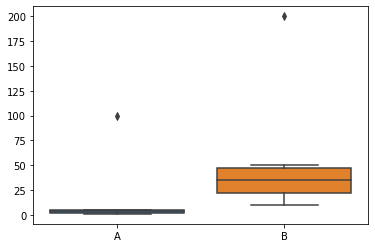

In [60]:
import pandas as pd
import seaborn as sns

# 创建一个示例数据帧
data = {'A': [1, 2, 3, 4, 5, 100], 'B': [10, 20, 30, 40, 50, 200]}
df = pd.DataFrame(data)

# 使用箱线图可视化异常值
sns.boxplot(data=df)


**异常值检测方法**： 可以使用统计方法（如 Z-分数、IQR 方法）、机器学习方法（如聚类和离群点检测算法）来检测异常值。一些库，如 scipy.stats 和   scikit-learn，提供了异常值检测的工具。

**处理异常值**： 一旦识别到异常值，你可以选择对其进行处理。处理方法包括删除异常值、替换为中位数或平均值、使用插值等。具体的处理方法取决于数据和分析需求。

以下是一个示例，演示如何使用 Z-分数方法来检测并替换异常值：

In [87]:
import pandas as pd
import numpy as np
from scipy import stats

# 创建示例数据帧
data = {'A': [1, 2, 3, 4, 5, 100], 'B': [10, 20, 30, 40, 50, 200]}
df = pd.DataFrame(data)

# 计算每列的 Z-分数
z_scores = np.abs(stats.zscore(df))
print(z_scores)

# 设置异常值阈值
threshold = 2

# 使用 Z-分数来识别和替换异常值  当z-score > threshold, 则认为是异常值
outliers = (z_scores > threshold).any(axis=1)
print('outliers:\n',outliers)
df_no_outliers = df[-outliers]

# 打印处理后的数据帧
print(df_no_outliers)

          A         B
0  0.502219  0.747532
1  0.474574  0.592870
2  0.446929  0.438208
3  0.419284  0.283547
4  0.391639  0.128885
5  2.234643  2.191042
outliers:
 0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool
   A   B
0  1  10
1  2  20
2  3  30
3  4  40
4  5  50


使用Machine Learning算法处理异常值  
下面是使用孤立森林算法的例子 （isolation forest）  
predict 方法返回一个数组，其中 1 表示正常值，-1 表示异常值。

In [90]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# 创建示例数据帧，并为列指定名称
data = {'A': [1, 2, 3, 4, 5, 100], 'B': [10, 20, 30, 40, 50, 200]}
df = pd.DataFrame(data)

# 创建孤立森林模型
clf = IsolationForest(contamination=0.1)# contamination参数设置异常值的比例

# 拟合模型
clf.fit(df)

# 预测异常值
outliers = clf.predict(df)

# 打印异常值的位置
print(outliers)

[ 1  1  1  1  1 -1]


E:\Programming\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


## 4. Data Standardization
`StandardScaler` 进行数据标准化，这将使数据的均值为0，标准差为1。 

`MinMaxScaler` 用于将特征缩放到指定的范围，通常是[0, 1]。它通过缩放特征的范围来进行标准化。  

`RobustScaler` RobustScaler 是一种鲁棒的标准化方法，不受异常值的影响。它使用中位数和四分位距来进行标准化。

In [105]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler

data = [[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]]

std_scaler=StandardScaler()
d1 = std_scaler.fit_transform(data)
print(d1,'\n')

minmax_scaler=MinMaxScaler()
d2=minmax_scaler.fit_transform(data)
print(d2,'\n')

rob_scaler=RobustScaler()
d3=rob_scaler.fit_transform(data)
print(d3)

[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]] 

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [0.75 0.75]
 [1.   1.  ]] 

[[-1.  -1. ]
 [-0.5 -0.5]
 [ 0.   0. ]
 [ 0.5  0.5]
 [ 1.   1. ]]


## 6. DataFrame Concatation


### 1. concat 堆叠合并
<big>`.concat(objs, axis=0, join='outer', ignore_index=False)`  </big>

objs：要拼接的数据结构，通常是一个包含多个数据帧或 Series 的列表。

axis：指定拼接的轴，可以是 0（默认，按行拼接,纵向堆叠）   或 1（按列拼接，横向堆叠）。

join：指定如何处理不匹配的索引（行或列标签），可以是 'inner'（只保留共同的标签）或 'outer'（保留所有标签，默认值）。

ignore_index：如果设置为 True，则将忽略拼接后的数据结构中的索引，并创建一个新的整数索引。

In [116]:
# 创建两个示例数据帧
data1 = {'A': [1, 2], 'B': [3, 4]}
data2 = {'A': [5, 6], 'B': [7, 8]}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

print(df1,'\n',df2,'\n')

# 在行方向拼接两个数据帧
result1 = pd.concat([df1, df2], axis=0)
print(result1)
# 在列方向拼接两个数据帧
result2 = pd.concat([df1, df2], axis=1)
print(result2)
# 忽略原始索引，创建新的整数索引
result3 = pd.concat([df1, df2], ignore_index=True)
print(result3)

   A  B
0  1  3
1  2  4 
    A  B
0  5  7
1  6  8 

   A  B
0  1  3
1  2  4
0  5  7
1  6  8
   A  B  A  B
0  1  3  5  7
1  2  4  6  8
   A  B
0  1  3
1  2  4
2  5  7
3  6  8


### 2. Merge 主键合并

<big>`merged_df = df1.merge(df2,how='inner' on='key')` </big>  

merge： merge 是 Pandas 中用于合并数据的功能非常强大的函数，它允许你基于一个或多个键（通常是列）将两个数据框连接起来。你可以指定连接的方式（内连接、外连接、左连接、右连接）以及连接键。这使得你可以根据共享的列将数据框连接在一起，类似于 SQL 中的 JOIN 操作。

df1：左侧的数据框，通常是要合并的主数据框。

df2：右侧的数据框，通常是要与主数据框合并的数据框。

how：指定合并方式，可以是 'inner'（只保留共同的标签）或 'outer'（保留所有标签，默认值）、'left'（左连接）、'right'（右连接）。

on：用于指定连接键的列名。如果两个数据框具有相同的列名，可以只指定一个列名，它将用作连接键。


In [125]:
# 创建示例数据帧 df1（员工信息）
data1 = {'EmployeeID': [1, 2, 3, 4],
         'Name': ['Alice', 'Bob', 'Charlie', 'David'],
         'DepartmentID': [101, 102, 101, 103]}

df1 = pd.DataFrame(data1)
print(df1)

# 创建示例数据帧 df2（部门信息）
data2 = {'DepartmentID': [101, 102, 103, 104],
         'DepartmentName': ['HR', 'Finance', 'IT', 'Marketing']}

df2 = pd.DataFrame(data2)
print(df2)

# 使用 merge 函数进行合并
merged_df = df1.merge(df2, on='DepartmentID', how='inner')

print(merged_df)

   EmployeeID     Name  DepartmentID
0           1    Alice           101
1           2      Bob           102
2           3  Charlie           101
3           4    David           103
   DepartmentID DepartmentName
0           101             HR
1           102        Finance
2           103             IT
3           104      Marketing
   EmployeeID     Name  DepartmentID DepartmentName
0           1    Alice           101             HR
1           3  Charlie           101             HR
2           2      Bob           102        Finance
3           4    David           103             IT


### 3. join() 主键合并
<big>`DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)`</big>

other：要连接的另一个数据帧。dataframe或Series

on：用于连接的列或索引名称。默认情况下，join 方法使用两个数据帧的索引进行连接。

how：连接方式，可以是 'left'、'right'、'inner' 或 'outer'。默认是 'left'，表示左连接。

lsuffix 和 rsuffix：用于处理重叠列名的后缀。如果两个数据帧具有相同的列名，可以使用这些参数来添加后缀以区分它们。

sort：默认为 False。如果设置为 True，则在连接之前会对索引进行排序。


In [131]:

# 创建示例数据帧 df1
data1 = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df1 = pd.DataFrame(data1, index=['X', 'Y', 'Z'])
print(df1,'\n')

# 创建示例数据帧 df2
data2 = {'C': [7, 8, 9], 'D': [10, 11, 12]}
df2 = pd.DataFrame(data2, index=['X', 'Y', 'Z'])
print(df2,'\n')

# 使用 join 方法连接两个数据帧
result = df1.join(df2, how='right')

print(result)


   A  B
X  1  4
Y  2  5
Z  3  6 

   C   D
X  7  10
Y  8  11
Z  9  12 

   A  B  C   D
X  1  4  7  10
Y  2  5  8  11
Z  3  6  9  12
